In [2]:
from numpy import testing
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python.keras.engine import training
from vae import VAE
from tensorflow.keras.datasets import mnist
from mpl_toolkits.mplot3d import Axes3D
import tensorflow_addons as tfa

In [29]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

training_0 = np.where(np.any([y_train == 0], axis = 0))
training_1 = np.where(np.any([y_train == 1], axis = 0))
training_2 = np.where(np.any([y_train == 2], axis = 0))

testing_0 = np.where(np.any([y_test == 0], axis = 0))
testing_1 = np.where(np.any([y_test == 1], axis = 0))
testing_2 = np.where(np.any([y_test == 2], axis = 0))


x_train_0 = (np.expand_dims(x_train, -1).astype('float32') / 255.)[training_0][:5923]
x_train_1 = (np.expand_dims(x_train, -1).astype('float32') / 255.)[training_1][:5923]
x_train_2 = (np.expand_dims(x_train, -1).astype('float32') / 255.)[training_2][:5923]


x_test_0 = (np.expand_dims(x_test, -1).astype('float32') / 255.)[testing_0][:5923]
x_test_1 = (np.expand_dims(x_test, -1).astype('float32') / 255.)[testing_1][:5923]
x_test_2 = (np.expand_dims(x_test, -1).astype('float32') / 255.)[testing_2][:5923]  

In [4]:
mnist_digits = np.concatenate([x_train, x_test], axis=0)
mnist_digits = np.expand_dims(mnist_digits, -1).astype("float32") / 255

In [6]:
vae = VAE()

In [27]:
vae.compile(optimizer=tf.keras.optimizers.Adam(), run_eagerly=True)

In [29]:
#vae.fit([x_train_0, x_train_1, x_train_2], epochs=30, batch_size=128)

#vae.fit(
#    {"input_1": x_train_0, "input_2": x_train_1, "input_3": x_train_2},
#    epochs=30 ,
#    batch_size=32,
#)
vae.fit([mnist_digits, mnist_digits, mnist_digits], epochs=100, batch_size=128)

Epoch 1/100
547/547 [==============================] - 149s 273ms/step - total_loss: 94.9132 - reconstruction_loss: 93.2901 - kl_loss: 1.6230
Epoch 2/100
547/547 [==============================] - 147s 269ms/step - total_loss: 91.7741 - reconstruction_loss: 90.1389 - kl_loss: 1.6351
Epoch 3/100
547/547 [==============================] - 147s 270ms/step - total_loss: 89.9996 - reconstruction_loss: 88.2967 - kl_loss: 1.7028
Epoch 4/100
547/547 [==============================] - 155s 283ms/step - total_loss: 88.6967 - reconstruction_loss: 86.9189 - kl_loss: 1.7778
Epoch 5/100
547/547 [==============================] - 165s 301ms/step - total_loss: 87.5879 - reconstruction_loss: 85.7409 - kl_loss: 1.8470
Epoch 6/100
547/547 [==============================] - 163s 297ms/step - total_loss: 86.7513 - reconstruction_loss: 84.8580 - kl_loss: 1.8933
Epoch 7/100
547/547 [==============================] - 157s 287ms/step - total_loss: 86.1501 - reconstruction_loss: 84.2169 - kl_loss: 1.9333
Epoch 

547/547 [==============================] - 146s 267ms/step - total_loss: 80.9084 - reconstruction_loss: 78.8741 - kl_loss: 2.0344
Epoch 59/100
547/547 [==============================] - 145s 266ms/step - total_loss: 80.8488 - reconstruction_loss: 78.8126 - kl_loss: 2.0362
Epoch 60/100
547/547 [==============================] - 145s 265ms/step - total_loss: 80.8176 - reconstruction_loss: 78.7841 - kl_loss: 2.0335
Epoch 61/100
547/547 [==============================] - 145s 265ms/step - total_loss: 80.8158 - reconstruction_loss: 78.7837 - kl_loss: 2.0321
Epoch 62/100
547/547 [==============================] - 145s 266ms/step - total_loss: 80.7677 - reconstruction_loss: 78.7303 - kl_loss: 2.0374
Epoch 63/100
547/547 [==============================] - 145s 265ms/step - total_loss: 80.7782 - reconstruction_loss: 78.7334 - kl_loss: 2.0447
Epoch 64/100
547/547 [==============================] - 145s 265ms/step - total_loss: 80.7473 - reconstruction_loss: 78.7126 - kl_loss: 2.0347
Epoch 65/100

In [7]:
vae_trained = VAE()
vae_trained.encoder = tf.keras.models.load_model('100_epochs_2d_encoder.h5')
vae_trained.decoder = tf.keras.models.load_model('100_epochs_2d_decoder.h5')
vae_trained.compile(optimizer=tf.keras.optimizers.Adam(), run_eagerly=True)

Text(0.5, 1.0, 'Random draw after 30 epochs')

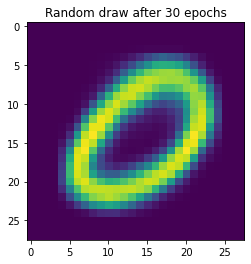

In [83]:
plt.figure(0)
plt.imshow(vae_trained.sample_image(1).reshape((28,28)))
plt.title('Random draw after 30 epochs')

Text(0, 0.5, '$z_2$')

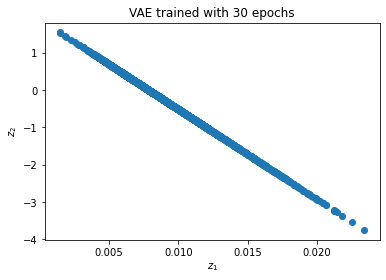

In [33]:
z = vae_trained.encod([x_train_0, x_train_1, x_train_2])[0].numpy()
plt.scatter(z[:,0], z[:,1])
plt.title('VAE trained with 30 epochs')
plt.xlabel('$z_1$')
plt.ylabel('$z_2$')

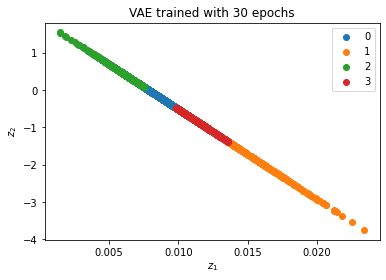

In [78]:
from sklearn.cluster import KMeans
no_clusters = 4
km = KMeans(n_clusters = no_clusters).fit(z)
labels = km.labels_
fig, ax = plt.subplots()
for i in np.unique(labels):
    ax.scatter(z[np.where(labels==i),0],
               z[np.where(labels==i),1], label=i)
ax.set(title='VAE trained with 30 epochs', xlabel='$z_1$',ylabel='$z_2$')
plt.legend()

In [65]:
#vae.save_model("100_epochs")

In [67]:
model_0_1_2 = VAE()
model_0_1_2.encoder = tf.keras.models.load_model('output/0_1_2_model_2d_encoder.h5')
model_0_1_2.decoder = tf.keras.models.load_model('output/0_1_2_model_2d_decoder.h5')
model_0_1_2.compile(optimizer=tf.keras.optimizers.Adam(), run_eagerly=True)

Text(0.5, 1.0, 'Random draw after 30 epochs')

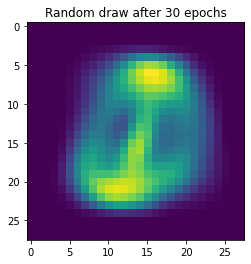

In [84]:
plt.figure(0)
plt.imshow(model_0_1_2.sample_image(1).reshape((28,28)))
plt.title('Random draw after 30 epochs')

Text(0, 0.5, '$z_2$')

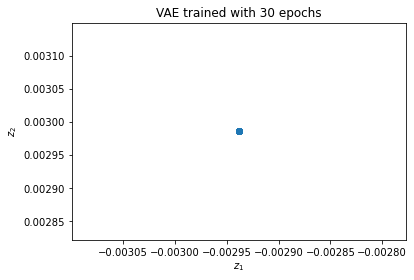

In [70]:
z1 = model_0_1_2.encod([x_train_0, x_train_1, x_train_2])[0].numpy()
plt.scatter(z1[:,0], z1[:,1])
plt.title('VAE trained with 30 epochs')
plt.xlabel('$z_1$')
plt.ylabel('$z_2$')

Text(0, 0.5, '$z_2$')

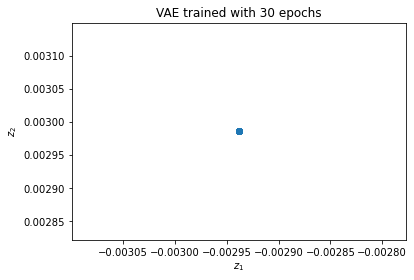

In [75]:
z1 = model_0_1_2.encod([mnist_digits[:5923], mnist_digits[:5923], mnist_digits[:5923]])[0].numpy()
plt.scatter(z1[:,0], z1[:,1])
plt.title('VAE trained with 30 epochs')
plt.xlabel('$z_1$')
plt.ylabel('$z_2$')

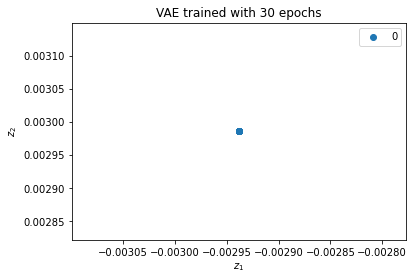

In [72]:
from sklearn.cluster import KMeans
no_clusters = 1
km = KMeans(n_clusters = no_clusters).fit(z1)
labels = km.labels_
fig, ax = plt.subplots()
for i in np.unique(labels):
    ax.scatter(z1[np.where(labels==i),0],
               z1[np.where(labels==i),1], label=i)
ax.set(title='VAE trained with 30 epochs', xlabel='$z_1$',ylabel='$z_2$')
plt.legend()

In [ ]:
feature_model = tf.keras.models(inputs=model_0_1_2.input, outputs=model_0_1_2.get_layer(name="embedding"))
feature = feature_model.predict([mnist_digits[:5923], mnist_digits[:5923], mnist_digits[:5923]])
print('feature shape=', features.shape)
km = KMeans(3)
features = np.reshape(features, newshape=(features.shape[0], -1))
pred = km.fit_predict(features)
plt.scatter(pred[:,0], pred[:,1])
plt.title('VAE trained with 30 epochs')
plt.xlabel('$z_1$')
plt.ylabel('$z_2$')